In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('HCLTECH.csv')
print(data.head())

         Date   Symbol Series  Prev Close    Open     High      Low     Last  \
0  2000-01-11  HCLTECH     EQ      580.00  1550.0  1725.00  1492.00  1560.00   
1  2000-01-12  HCLTECH     EQ     1554.45  1560.0  1678.85  1560.00  1678.85   
2  2000-01-13  HCLTECH     EQ     1678.85  1790.0  1813.20  1781.00  1813.20   
3  2000-01-14  HCLTECH     EQ     1813.20  1958.3  1958.30  1835.00  1958.30   
4  2000-01-17  HCLTECH     EQ     1958.30  2115.0  2115.00  1801.65  1801.65   

     Close     VWAP   Volume      Turnover  Trades  Deliverable Volume  \
0  1554.45  1582.72  1192200  1.886915e+14     NaN                 NaN   
1  1678.85  1657.05   344850  5.714349e+13     NaN                 NaN   
2  1813.20  1804.69    53000  9.564880e+12     NaN                 NaN   
3  1958.30  1939.90   270950  5.256169e+13     NaN                 NaN   
4  1801.65  1990.55   428800  8.535473e+13     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3     

In [ ]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [ ]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5295,2021-04-26,HCLTECH,EQ,955.65,940.0,954.50,923.05,930.00,928.80,931.70,19619972,1.827997e+15,311431.0,9218485.0,0.4699
5296,2021-04-27,HCLTECH,EQ,928.80,931.0,938.55,923.40,930.30,928.85,928.06,6406825,5.945938e+14,180458.0,3233276.0,0.5047
5297,2021-04-28,HCLTECH,EQ,928.85,931.2,935.85,921.75,925.90,923.80,926.63,6845677,6.343403e+14,228230.0,3890178.0,0.5683
5298,2021-04-29,HCLTECH,EQ,923.80,929.7,929.70,907.10,910.30,909.55,914.34,8588734,7.852988e+14,363122.0,4041614.0,0.4706


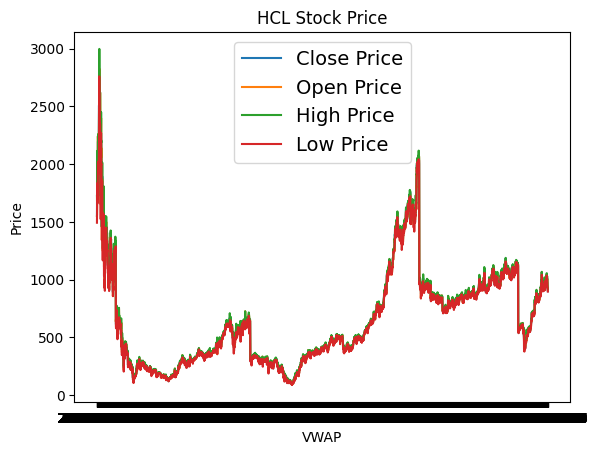

In [ ]:
timesteps=data["Date"].to_numpy()
prices=data["VWAP"].to_numpy()
open_price=data["Open"].to_numpy()
high_price=data["High"].to_numpy()
low_price=data["Low"].to_numpy()
close_price=data["Close"].to_numpy()
plt.plot(figsize=(30,15))
plt.plot(timesteps,close_price,label='Close Price')
plt.plot(timesteps,open_price,label="Open Price")
plt.plot(timesteps,high_price,label="High Price")
plt.plot(timesteps,low_price,label="Low Price")
#plt.plot(timesteps,prices,label="VWAP")
plt.title("HCL Stock Price")
plt.ylabel("Price")
plt.xlabel("VWAP")
plt.legend(fontsize=14)

In [ ]:
data.to_csv('HCL_iter1.csv')

In [ ]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [ ]:
data.drop(columns=['High', 'Low', 'Last',],inplace=True)

In [ ]:
data.head(100)

,Date,Symbol,Series,Prev Close,Open,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.0,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.0,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2000-05-31,HCLTECH,EQ,1097.70,1185.5,1229.45,1226.45,37350,4.580774e+12,NaN,NaN,NaN
96,2000-06-01,HCLTECH,EQ,1229.45,1250.0,1122.15,1133.92,373300,4.232912e+13,NaN,NaN,NaN
97,2000-06-02,HCLTECH,EQ,1122.15,1159.0,1256.85,1220.31,246450,3.007454e+13,NaN,NaN,NaN
98,2000-06-05,HCLTECH,EQ,1256.85,1357.4,1391.90,1403.13,215250,3.020233e+13,NaN,NaN,NaN


In [ ]:
data.count()

,0
Date,5300
Symbol,5300
Series,5300
Prev Close,5300
Open,5300
Close,5300
VWAP,5300
Volume,5300
Turnover,5300
Trades,2456


In [ ]:
data['Close'].isnull().sum()

0

In [ ]:
data = pd.read_csv('HCL_clean.csv')

In [ ]:
data

,Unnamed: 0,Prev Close,Open,Close
0,2844,514.80,511.40,514.40
1,2845,514.40,509.00,513.70
2,2846,513.70,512.05,512.35
3,2847,512.35,508.05,509.50
4,2848,509.50,504.05,511.80
...,...,...,...,...
2451,5295,955.65,940.00,928.80
2452,5296,928.80,931.00,928.85
2453,5297,928.85,931.20,923.80
2454,5298,923.80,929.70,909.55


In [ ]:
data.columns

Index(['Unnamed: 0', 'Prev Close', 'Open', 'Close'], dtype='object')

In [ ]:
feature_prevclose=data["Prev Close"].to_numpy()
feature_prevclose

array([514.8 , 514.4 , 513.7 , ..., 928.85, 923.8 , 909.55])

In [ ]:
feature_open=data["Open"].to_numpy()
feature_open

array([511.4 , 509.  , 512.05, ..., 931.2 , 929.7 , 905.  ])

In [ ]:
features=np.column_stack((feature_prevclose,feature_open))

In [ ]:
features

array([[514.8 , 511.4 ],
       [514.4 , 509.  ],
       [513.7 , 512.05],
       ...,
       [928.85, 931.2 ],
       [923.8 , 929.7 ],
       [909.55, 905.  ]])

In [ ]:
close_price=data["Close"].to_numpy()
close_price

array([514.4 , 513.7 , 512.35, ..., 923.8 , 909.55, 898.95])

In [ ]:
len(features),len(close_price)

(2456, 2456)

In [ ]:
split_index= 2456 * 0.8 # len of dataset * ratio of split

In [ ]:
X_train=features[:int(split_index)]
X_test=features[int(split_index):]
y_train=close_price[:int(split_index)]
y_test=close_price[int(split_index):]

In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

(1964, 492, 1964, 492)

In [ ]:
X_train.shape,y_train.shape

((1964, 2), (1964,))

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
    return mae / mae_naive_no_season

In [ ]:
# Create loss function to return all loss metrics in dictionary format
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {"mase": mase.numpy()}

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

def get_labelled_windows(x, horizon=HORIZON):
    return x[:, :-horizon], x[:, -horizon:]

In [ ]:
def make_windows(x,window_size=7,horizon=1):
  #Turns a 1D array into a 2D array of sequential winsows of window_state
    window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
    windowed_array = x[window_indexes]
    windows,labels = get_labelled_windows(windowed_array)
    return windows,labels

full_windows,full_labels = make_windows(features)
len(full_windows),len(full_labels)

(2449, 2449)

In [ ]:
import tensorflow as tf

input_shape = (2,1)

inputs = tf.keras.layers.Input(shape=input_shape)

x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(inputs)

x = tf.keras.layers.GRU(32, return_sequences=False)(x)

x = tf.keras.layers.Dense(64, activation='relu')(x)

output = tf.keras.layers.Dense(1)(x)

model = tf.keras.models.Model(inputs=inputs, outputs=output)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 2, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 2, 128)              │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, 32)                  │          15,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,521 (201.25 KB)

 Trainable params: 51,521 (201.25 KB)

 Non-trainable params: 0 (0.00 B)

62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 911179.1250 - mae: 898.3942 - val_loss: 714827.8750 - val_mae: 815.6058
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 839896.1875 - mae: 885.3116   
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


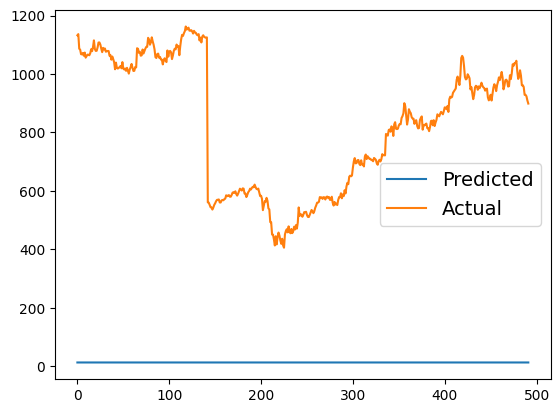

In [ ]:
model.fit(X_train,y_train,epochs=1,validation_data=(X_test,y_test))
model.evaluate(X_test,y_test)
predictions=model.predict(X_test)
plt.plot(predictions,label="Predicted")
plt.plot(y_test,label="Actual")
plt.legend(fontsize=14)


In [ ]:
q = np.array([1045.4,1042.95]).reshape(1, 2)  # Reshaping to (1, 2)
pred = model.predict(q)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[13.106508]]


In [ ]:
model.save('HCL_model(lil__even_better).keras')

In [ ]:
import tensorflow as tf

model0 = tf.keras.Sequential()
input = tf.keras.layers.Input(shape=(2,1))
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(input)
x = tf.keras.layers.GRU(32, return_sequences=False)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output = tf.keras.layers.Dense(1)(x)
model0 = tf.keras.Model(inputs=input, outputs=output)
model0.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
model0.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 2, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 2, 128)              │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 32)                  │          15,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,521 (201.25 KB)

 Trainable params: 51,521 (201.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model0.fit(X_train,y_train,epochs=250,validation_data=(X_test,y_test))
model0.evaluate(X_test,y_test)

Epoch 1/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 909695.9375 - mae: 893.8850 - val_loss: 721258.4375 - val_mae: 819.5384
Epoch 2/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 924458.5625 - mae: 899.1954 - val_loss: 691534.1250 - val_mae: 801.1984
Epoch 3/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 895460.2500 - mae: 882.2198 - val_loss: 649341.9375 - val_mae: 774.4201
Epoch 4/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 857981.3125 - mae: 860.6742 - val_loss: 595823.8750 - val_mae: 739.0591
Epoch 5/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 788956.1875 - mae: 821.6947 - val_loss: 533446.5625 - val_mae: 695.5797
Epoch 6/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 702963.0000 - mae: 767.9204 - val_loss: 465178.5625 - val_mae: 644.6420
Epoch 7/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 640971.5000 - mae: 724.0944 - val_loss: 395133.6875 - val_mae: 587.8080
Epoch 8/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 534926.4375 - mae: 650.

[307.1834411621094, 13.138179779052734]

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step


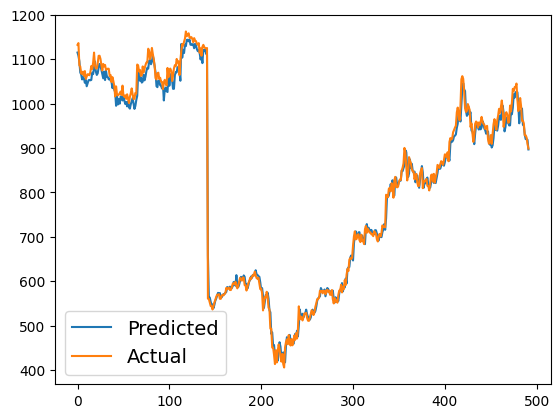

In [ ]:
predictions=model0.predict(X_test)
plt.plot(predictions,label="Predicted")
plt.plot(y_test,label="Actual")
plt.legend(fontsize=14)

In [ ]:
q = np.array([991.35,997.9]).reshape(1, 2)  # Reshaping to (1, 2)
pred = model0.predict(q)
print(pred) #Actual Value 978.95

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[981.98566]]


In [ ]:
model.save('HCL_model(best_rn).keras')